In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

from sklearn import model_selection
from sklearn import ensemble
from sklearn import svm
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import VotingClassifier

import bs4 as bs  
import urllib.request  
import re
from nltk.stem.porter import PorterStemmer

import nltk  
import random  
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
import tqdm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [213]:
from collections import Counter

In [214]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **Ouverture du csv, un peu long car volumineux**

In [215]:
df=pd.read_csv('/content/gdrive/My Drive/Val_projet/airbnb.csv',";")

In [216]:
# Methode BOW

In [217]:
df['Features'] = df['Features'].astype(str)

In [218]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    print(i)
    title = re.sub('[^a-zA-Z]', ' ', df['Features'][i])
    title = title.lower()
    title = title.split()
    
    title = [ps.stem(word) for word in title if not word in stopwords.words('english')]
    title = ' '.join(title)
    corpus.append(title)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
489954
489955
489956
489957
489958
489959
489960
489961
489962
489963
489964
489965
489966
489967
489968
489969
489970
489971
489972
489973
489974
489975
489976
489977
489978
489979
489980
489981
489982
489983
489984
489985
489986
489987
489988
489989
489990
489991
489992
489993
489994
489995
489996
489997
489998
489999
490000
490001
490002
490003
490004
490005
490006
490007
490008
490009
490010
490011
490012
490013
490014
490015
490016
490017
490018
490019
490020
490021
490022
490023
490024
490025
490026
490027
490028
490029
490030
490031
490032
490033
490034
490035
490036
490037
490038
490039
490040
490041
490042
490043
490044
490045
490046
490047
490048
490049
490050
490051
490052
490053
490054
490055
490056
490057
490058
490059
490060
490061
490062
490063
490064
490065
490066
490067
490068
490069
490070
490071
490072
490073
490074
490075
490076
490077
490078
490079
490080
490081
490082
490083
490084
49008

In [219]:
corpus

['host profil pic',
 'host superhost host profil pic host ident verifi locat exact instant bookabl',
 'host profil pic host ident verifi',
 'host profil pic',
 'host profil pic',
 'host superhost host profil pic host ident verifi',
 'host profil pic host ident verifi locat exact',
 'host profil pic host ident verifi locat exact',
 'host profil pic host ident verifi locat exact',
 'host profil pic',
 'host profil pic host ident verifi locat exact instant bookabl',
 'host profil pic host ident verifi locat exact instant bookabl',
 'host profil pic host ident verifi locat exact',
 'host profil pic host ident verifi',
 'host profil pic host ident verifi locat exact',
 'host profil pic locat exact instant bookabl',
 'host profil pic host ident verifi locat exact',
 'host profil pic host ident verifi locat exact instant bookabl',
 'host profil pic host ident verifi locat exact instant bookabl',
 'host profil pic host ident verifi locat exact requir guest phone verif',
 'host profil pic locat

In [220]:
from sklearn.feature_extraction.text import CountVectorizer
#Creating the bag of words
bow_article = CountVectorizer().fit(corpus)

count_tokens=bow_article.get_feature_names()

article_vect = bow_article.transform(corpus)
count_tokens

['bookabl',
 'exact',
 'guest',
 'host',
 'ident',
 'instant',
 'licens',
 'locat',
 'nan',
 'phone',
 'pic',
 'pictur',
 'profil',
 'requir',
 'superhost',
 'verif',
 'verifi']

In [221]:
df_count_vect=pd.DataFrame(data=article_vect.toarray(),columns=count_tokens)
df_count_vect

bookabl  exact  guest  host  ...  requir  superhost  verif  verifi
0             0      0      0     1  ...       0          0      0       0
1             1      1      0     3  ...       0          1      0       1
2             0      0      0     2  ...       0          0      0       1
3             0      0      0     1  ...       0          0      0       0
4             0      0      0     1  ...       0          0      0       0
...         ...    ...    ...   ...  ...     ...        ...    ...     ...
494949        0      1      0     1  ...       0          0      0       0
494950        0      0      0     2  ...       0          0      0       1
494951        0      0      0     1  ...       0          0      0       0
494952        0      1      0     2  ...       0          0      0       1
494953        0      1      0     1  ...       0          0      0       0

[494954 rows x 17 columns]

In [222]:
df = df.merge(df_count_vect, how='outer', left_index=True, right_index=True)

In [223]:
df.head(10)

ID                            Listing Url  ... verif verifi
0  15802051  https://www.airbnb.com/rooms/15802051  ...     0      0
1  14751869  https://www.airbnb.com/rooms/14751869  ...     0      1
2   8901485   https://www.airbnb.com/rooms/8901485  ...     0      1
3   5832248   https://www.airbnb.com/rooms/5832248  ...     0      0
4   8049784   https://www.airbnb.com/rooms/8049784  ...     0      0
5   5043110   https://www.airbnb.com/rooms/5043110  ...     0      1
6   6354114   https://www.airbnb.com/rooms/6354114  ...     0      1
7  13169873  https://www.airbnb.com/rooms/13169873  ...     0      1
8  11858562  https://www.airbnb.com/rooms/11858562  ...     0      1
9   6352486   https://www.airbnb.com/rooms/6352486  ...     0      0

[10 rows x 106 columns]

Le dataframe est immense et nous n'allons pas tout utiliser, nous supprimons toutes les colonnes qui ne sont pas utiles à notre recherche. Nous pourrons toujours venir les rechercher si nous en avons le besoin


In [224]:
#Premiere supression de variables pas utiles à notre analyse
df=df.drop(['Listing Url','Scrape ID','Last Scraped','Host Acceptance Rate','Scrape ID','Last Scraped',
            'Thumbnail Url','Medium Url','Picture Url','XL Picture Url','Host URL','Host Acceptance Rate',
           'Host Thumbnail Url','Host Picture Url','Host Verifications','Neighbourhood','Neighbourhood Group Cleansed',
           'Geolocation','Has Availability','Calendar last Scraped','License','Jurisdiction Names'], axis=1)

In [225]:
#deuxieme supression de variables pas utiles à notre analyse ################## je remets features
df=df.drop(['Summary','Space','Experiences Offered','Notes','Access','State','Zipcode','Host Name','Host Location','Host Neighbourhood', 'Host ID',
           'Host Listings Count','Smart Location','Country Code','Square Feet','Security Deposit','Calendar Updated',
            'Guests Included','Extra People','Street','Country','Cancellation Policy','Calculated host listings count','Market'], axis=1)

In [226]:
#On rename les colonnes qui ont des espaces
df.rename(columns={'ID':"id",'Name': 'name', 'Description': 'description', 'Host About': 'host_about', 'Host Response Time': 'host_response_time', 'Host Response Rate': 'host_response_rate', 'Host Total Listings Count': 'host_total_listing_count', 'Neighbourhood Cleansed': 'neighbourhood_cleansed' , 'City': 'city', 'Property Type': 'property_type', 'Room Type': 'room_type', 'Accommodates': 'accommodates'
, 'Bathrooms': 'bathrooms', 'Bedrooms': 'bedrooms', 'Beds': 'beds', 'Bed Type': 'bed_type', 'Amenities': 'amenities', 'Price': 'price', 'Weekly Price': 'weekly_price', 'Monthly Price': 'monthly_price', 'Cleaning Fee': 'cleaning_fee', 'Minimum Nights': 'minimum_nights', 'Maximum Nights': 'maximum_nights', 'Availability 30': 'availability_30', 'Availability 60': 'availability_60', 'Availability 90': 'availability_90', 'Availability 365': 'availability_365', 'Number of Reviews': 'number_of_reviews', 'First Review': 'first_review'
, 'Last Review': 'last_review', 'Review Scores Rating': 'review_scores_rating', 'Review Scores Accuracy': 'review_scores_accuracy', 'Review Scores Cleanliness': 'review_scores_cleanliness', 'Review Scores Checkin': 'review_scores_checkin', 'Review Scores Communication': 'review_scores_communication', 'Review Scores Location': 'review_scores_location', 'Review Scores Value': 'review_scores_value', 'Reviews per Month': 'reviews_per_month', 'Longitude': 'longitude','Latitude': 'latitude',"Neighborhood Overview":"neighborhood_overview","Transit":"transit","Interaction":"interaction","House Rules":"house_rules","Host Since":"host_since"}, inplace=True)

In [227]:
# on met la colonne id en index

df=df.set_index("id")

In [228]:
#Nous allons nous concentrer sur les villes de Paris et Londres, avant de commencer le nettoyage nous allons garder uniquement toutes les données concernant ces deux villes

#on divise le df par villes puis on les regroupe dans df
df_paris=df[df.city=='Paris']
df_london=df[df.city=='London']
df = df_paris.append(df_london)

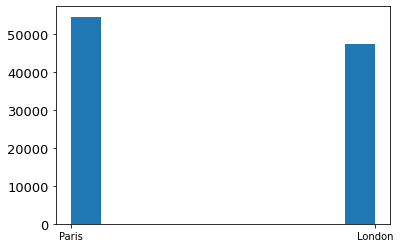

In [229]:
plt.hist(df.city)
plt.show()

In [230]:
#On verifie qu'il reste bien uniquement Paris et Londres
print(df['city'].unique())

['Paris' 'London']


# **Analyse du dataframe**

In [231]:
#informations
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101936 entries, 7735531 to 14561490
Data columns (total 62 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   name                         101932 non-null  object 
 1   description                  101922 non-null  object 
 2   neighborhood_overview        60460 non-null   object 
 3   transit                      64012 non-null   object 
 4   interaction                  52028 non-null   object 
 5   house_rules                  58563 non-null   object 
 6   host_since                   101917 non-null  object 
 7   host_about                   58891 non-null   object 
 8   host_response_time           72188 non-null   object 
 9   host_response_rate           72188 non-null   float64
 10  host_total_listing_count     101917 non-null  float64
 11  neighbourhood_cleansed       101936 non-null  object 
 12  city                         101936 non-null  object 
 

In [232]:
#Somme des Nans par colonne
df.isna().sum()

name                         4
description                 14
neighborhood_overview    41476
transit                  37924
interaction              49908
                         ...  
profil                       0
requir                       0
superhost                    0
verif                        0
verifi                       0
Length: 62, dtype: int64

In [233]:
#Somme des Nans par colonne
print('\n Données manquantes par colonne :\n')
print(df.isna().sum())


 Données manquantes par colonne :

name                         4
description                 14
neighborhood_overview    41476
transit                  37924
interaction              49908
                         ...  
profil                       0
requir                       0
superhost                    0
verif                        0
verifi                       0
Length: 62, dtype: int64


In [234]:
#Verification des doublons
df.duplicated().sum()

0

In [235]:
#Nombre de valeur unique par colonne
df.nunique()

name                      98320
description              100242
neighborhood_overview     55331
transit                   59619
interaction               44384
                          ...  
profil                        3
requir                        3
superhost                     2
verif                         2
verifi                        2
Length: 62, dtype: int64

In [236]:
#description
df.describe()

host_response_rate  ...         verifi
count        72188.000000  ...  101936.000000
mean            92.151189  ...       0.580119
std             19.620885  ...       0.493542
min              0.000000  ...       0.000000
25%             96.000000  ...       0.000000
50%            100.000000  ...       1.000000
75%            100.000000  ...       1.000000
max            100.000000  ...       1.000000

[8 rows x 44 columns]

In [237]:
# Combien de quartier sont disponibles et quel est leur fréquence
df_paris.groupby('neighbourhood_cleansed').count().sort_values('name', ascending=False)
#Il y a 20 quartiers. Le plus fréquents est Buttes-Montmartre.

name  description  ...  verif  verifi
neighbourhood_cleansed                     ...               
Buttes-Montmartre       6315         6314  ...   6315    6315
Popincourt              5381         5381  ...   5381    5381
Vaugirard               4000         4000  ...   4000    4000
Entrepôt                3749         3748  ...   3749    3749
Batignolles-Monceau     3547         3547  ...   3547    3547
Ménilmontant            2981         2980  ...   2981    2981
Buttes-Chaumont         2951         2951  ...   2951    2951
Passy                   2895         2895  ...   2895    2895
Opéra                   2390         2391  ...   2391    2391
Temple                  2368         2368  ...   2368    2368
Observatoire            2160         2161  ...   2161    2161
Reuilly                 2156         2155  ...   2156    2156
Panthéon                1989         1988  ...   1989    1989
Gobelins                1940         1940  ...   1940    1940
Hôtel-de-Ville          1927         1926  ...   1927    1927
Luxembourg              1846         1846  ...   1846    1846
Palais-Bourbon          1709         1708  ...   1709    1709
Bourse                  1620         1620  ...   1620    1620
Élysée                  1459         1459  ...   1459    1459
Louvre                  1127         1128  ...   1128    1128

[20 rows x 61 columns]

In [238]:
# Combien de quartier sont disponibles et quel est leur fréquence
df_london.groupby('neighbourhood_cleansed').count().sort_values('name', ascending=False)
#Il y a 33 quartiers. Le plus fréquents est Tower Hamlets

name  description  ...  verif  verifi
neighbourhood_cleansed                     ...               
Tower Hamlets           5398         5398  ...   5398    5398
Westminster             5170         5170  ...   5170    5170
Hackney                 4433         4431  ...   4433    4433
Camden                  3604         3604  ...   3604    3604
Islington               3403         3403  ...   3403    3403
Kensington and Chelsea  3314         3314  ...   3314    3314
Southwark               3182         3182  ...   3182    3182
Lambeth                 3088         3086  ...   3088    3088
Hammersmith and Fulham  2680         2679  ...   2680    2680
Wandsworth              2597         2595  ...   2597    2597
Haringey                1414         1414  ...   1414    1414
Lewisham                1393         1393  ...   1393    1393
Brent                   1298         1298  ...   1298    1298
Newham                  1088         1089  ...   1089    1089
Waltham Forest           868          868  ...    868     868
Greenwich                859          859  ...    859     859
Ealing                   844          844  ...    844     844
Barnet                   752          752  ...    752     752
Merton                   602          602  ...    602     602
City of London           294          294  ...    294     294
Hounslow                 281          281  ...    281     281
Enfield                  190          190  ...    190     190
Croydon                  181          181  ...    181     181
Richmond upon Thames     177          177  ...    177     177
Bromley                  142          142  ...    142     142
Redbridge                111          111  ...    111     111
Bexley                    15           15  ...     15      15
Harrow                    11           11  ...     11      11
Barking and Dagenham      10           10  ...     10      10
Kingston upon Thames       9            9  ...      9       9
Hillingdon                 6            6  ...      6       6
Sutton                     4            4  ...      4       4
Havering                   4            4  ...      4       4

[33 rows x 61 columns]

In [239]:
df_paris.groupby('neighbourhood_cleansed').mean('review_scores_rating').sort_values('review_scores_rating', ascending=False)['review_scores_rating']
# Les annonces des quartier Palais Bourbon et Louvres recoltent les meilleurs notes générales


neighbourhood_cleansed
Palais-Bourbon         92.458270
Louvre                 92.444444
Opéra                  92.245388
Temple                 92.225774
Popincourt             92.152404
Panthéon               92.111459
Entrepôt               92.030534
Hôtel-de-Ville         91.962940
Ménilmontant           91.913064
Buttes-Montmartre      91.882724
Reuilly                91.870611
Passy                  91.708759
Batignolles-Monceau    91.676917
Buttes-Chaumont        91.622288
Luxembourg             91.617747
Vaugirard              91.608589
Bourse                 91.307024
Observatoire           91.297710
Gobelins               91.212186
Élysée                 91.135387
Name: review_scores_rating, dtype: float64

In [240]:
df_london.groupby('neighbourhood_cleansed').mean('review_scores_rating').sort_values('review_scores_rating', ascending=False)['review_scores_rating']
# Les annonces des quartier Barking and Dagenham et Croydon recoltent les meilleurs notes générales


neighbourhood_cleansed
Barking and Dagenham      95.166667
Croydon                   94.722772
Hounslow                  94.197861
Redbridge                 94.178082
Richmond upon Thames      94.084906
Merton                    93.713068
Enfield                   93.627273
Haringey                  93.569989
Wandsworth                93.538462
Hackney                   93.453218
Ealing                    93.297989
Greenwich                 92.706767
Harrow                    92.625000
Lambeth                   92.619514
Kingston upon Thames      92.500000
Bromley                   92.282609
Lewisham                  92.238359
Islington                 92.231552
Southwark                 92.170489
Barnet                    91.986175
Hammersmith and Fulham    91.774229
Kensington and Chelsea    91.199329
Waltham Forest            91.181308
Newham                    91.066860
Brent                     90.994969
Camden                    90.621488
Bexley                    90.307692
Westm

In [241]:
df_paris.groupby('neighbourhood_cleansed').mean('number_of_reviews').sort_values('number_of_reviews', ascending=False)['number_of_reviews']
#Le quartier qui récolte le plus d'avis est Hotel de Ville puis Bourse et Louvre


neighbourhood_cleansed
Hôtel-de-Ville         28.946549
Bourse                 26.767284
Louvre                 26.396277
Temple                 25.124578
Luxembourg             20.915493
Panthéon               19.262443
Palais-Bourbon         18.531890
Élysée                 15.944483
Entrepôt               15.352094
Opéra                  15.269762
Popincourt             13.816949
Buttes-Montmartre      13.685194
Vaugirard              12.539250
Observatoire           12.162888
Reuilly                12.101113
Gobelins               11.944330
Passy                  11.391364
Batignolles-Monceau    10.552298
Ménilmontant            9.669574
Buttes-Chaumont         9.442223
Name: number_of_reviews, dtype: float64

In [242]:
df_london.groupby('neighbourhood_cleansed').mean('number_of_reviews').sort_values('number_of_reviews', ascending=False)['number_of_reviews']
#Le quartier qui récolte le plus d'avis est Harrow puis Barking and Dagenham et Westiminster


neighbourhood_cleansed
Harrow                    37.090909
Barking and Dagenham      16.400000
Westminster               15.978723
Camden                    15.653996
Hounslow                  15.163701
Southwark                 15.125393
Lambeth                   14.589702
Kensington and Chelsea    13.417924
City of London            13.088435
Hammersmith and Fulham    12.864925
Islington                 12.821628
Tower Hamlets             12.294554
Newham                    11.418733
Ealing                    11.316351
Havering                  10.500000
Redbridge                 10.288288
Hackney                    9.752763
Greenwich                  9.295693
Lewisham                   9.207466
Haringey                   8.900990
Waltham Forest             8.676267
Wandsworth                 8.572969
Richmond upon Thames       8.367232
Brent                      8.360555
Enfield                    8.352632
Bromley                    7.521127
Sutton                     7.000000
Croyd

In [243]:
df_paris.groupby('neighbourhood_cleansed').mean('review_scores_location').sort_values('review_scores_location', ascending=False)['review_scores_location']
# Le quartier le mieux noté est Hotel de ville

neighbourhood_cleansed
Hôtel-de-Ville         9.913313
Luxembourg             9.892760
Louvre                 9.892704
Palais-Bourbon         9.885171
Panthéon               9.825487
Temple                 9.814500
Élysée                 9.739417
Passy                  9.701025
Opéra                  9.660123
Bourse                 9.659652
Vaugirard              9.589699
Popincourt             9.533663
Observatoire           9.480561
Batignolles-Monceau    9.445197
Reuilly                9.444227
Gobelins               9.340288
Entrepôt               9.293811
Buttes-Chaumont        9.164607
Ménilmontant           9.135618
Buttes-Montmartre      9.092797
Name: review_scores_location, dtype: float64

In [244]:
df_london.groupby('neighbourhood_cleansed').mean('review_scores_location').sort_values('review_scores_location', ascending=False)['review_scores_location']
# Le quartier le mieux noté est Hillingdon

neighbourhood_cleansed
Hillingdon                9.750000
Kensington and Chelsea    9.691270
Westminster               9.662417
Camden                    9.596571
City of London            9.583333
Richmond upon Thames      9.571429
Hounslow                  9.508021
Islington                 9.479167
Merton                    9.436261
Wandsworth                9.401914
Hammersmith and Fulham    9.384488
Redbridge                 9.383562
Hackney                   9.380366
Ealing                    9.321101
Lambeth                   9.287054
Barnet                    9.245327
Southwark                 9.215217
Bromley                   9.184783
Greenwich                 9.172932
Enfield                   9.172727
Haringey                  9.172492
Tower Hamlets             9.094643
Croydon                   9.070000
Harrow                    9.000000
Lewisham                  8.978818
Brent                     8.933081
Waltham Forest            8.909774
Newham                    8.8477

In [245]:
df_paris.groupby(['neighbourhood_cleansed', 'room_type']).count()

name  description  ...  verif  verifi
neighbourhood_cleansed room_type                           ...               
Batignolles-Monceau    Entire home/apt  3075         3075  ...   3075    3075
                       Private room      452          452  ...    452     452
                       Shared room        20           20  ...     20      20
Bourse                 Entire home/apt  1454         1454  ...   1454    1454
                       Private room      145          145  ...    145     145
                       Shared room        21           21  ...     21      21
Buttes-Chaumont        Entire home/apt  2335         2335  ...   2335    2335
                       Private room      574          574  ...    574     574
                       Shared room        42           42  ...     42      42
Buttes-Montmartre      Entire home/apt  5461         5461  ...   5461    5461
                       Private room      804          803  ...    804     804
                       Shared room        50           50  ...     50      50
Entrepôt               Entire home/apt  3102         3101  ...   3102    3102
                       Private room      592          592  ...    592     592
                       Shared room        55           55  ...     55      55
Gobelins               Entire home/apt  1470         1470  ...   1470    1470
                       Private room      442          442  ...    442     442
                       Shared room        28           28  ...     28      28
Hôtel-de-Ville         Entire home/apt  1782         1781  ...   1782    1782
                       Private room      136          136  ...    136     136
                       Shared room         9            9  ...      9       9
Louvre                 Entire home/apt  1039         1040  ...   1040    1040
                       Private room       82           82  ...     82      82
                       Shared room         6            6  ...      6       6
Luxembourg             Entire home/apt  1693         1693  ...   1693    1693
                       Private room      146          146  ...    146     146
                       Shared room         7            7  ...      7       7
Ménilmontant           Entire home/apt  2407         2406  ...   2407    2407
                       Private room      536          536  ...    536     536
                       Shared room        38           38  ...     38      38
Observatoire           Entire home/apt  1768         1769  ...   1769    1769
                       Private room      332          332  ...    332     332
                       Shared room        60           60  ...     60      60
Opéra                  Entire home/apt  2066         2067  ...   2067    2067
                       Private room      311          311  ...    311     311
                       Shared room        13           13  ...     13      13
Palais-Bourbon         Entire home/apt  1539         1538  ...   1539    1539
                       Private room      159          159  ...    159     159
                       Shared room        11           11  ...     11      11
Panthéon               Entire home/apt  1786         1785  ...   1786    1786
                       Private room      185          185  ...    185     185
                       Shared room        18           18  ...     18      18
Passy                  Entire home/apt  2554         2554  ...   2554    2554
                       Private room      309          309  ...    309     309
                       Shared room        32           32  ...     32      32
Popincourt             Entire home/apt  4682         4682  ...   4682    4682
                       Private room      645          645  ...    645     645
                       Shared room        54           54  ...     54      54
Reuilly                Entire home/apt  1799         1798  ...   1799    1799
                       Private room      341          341  ...

In [246]:
df_london.groupby(['neighbourhood_cleansed', 'room_type']).count()

name  description  ...  verif  verifi
neighbourhood_cleansed room_type                           ...               
Barking and Dagenham   Entire home/apt     4            4  ...      4       4
                       Private room        6            6  ...      6       6
Barnet                 Entire home/apt   273          273  ...    273     273
                       Private room      474          474  ...    474     474
                       Shared room         5            5  ...      5       5
...                                      ...          ...  ...    ...     ...
Wandsworth             Private room     1307         1305  ...   1307    1307
                       Shared room        14           14  ...     14      14
Westminster            Entire home/apt  3495         3495  ...   3495    3495
                       Private room     1634         1634  ...   1634    1634
                       Shared room        41           41  ...     41      41

[93 rows x 60 columns]

In [247]:
# Quelle quartier a le plus gris pm
df_paris.groupby('neighbourhood_cleansed').mean().sort_values('price', ascending=False)['price']
# Élysée

neighbourhood_cleansed
Élysée                 152.751381
Luxembourg             142.119913
Louvre                 139.022183
Palais-Bourbon         138.453107
Hôtel-de-Ville         131.277778
Passy                  123.859570
Temple                 120.041807
Bourse                 111.389988
Panthéon               109.756036
Opéra                   98.421757
Vaugirard               90.633567
Batignolles-Monceau     88.391819
Entrepôt                82.779616
Observatoire            80.929434
Popincourt              79.487546
Reuilly                 77.828770
Buttes-Montmartre       74.813243
Gobelins                72.221764
Buttes-Chaumont         66.420285
Ménilmontant            65.175444
Name: price, dtype: float64

In [248]:
# Quelle quartier a le plus gris pm
df_london.groupby('neighbourhood_cleansed').mean().sort_values('price', ascending=False)['price']
# Kensington and Chelsea et City of London

neighbourhood_cleansed
Kensington and Chelsea    149.686875
City of London            149.299320
Westminster               138.261637
Richmond upon Thames      125.480000
Hounslow                  115.110320
Camden                    114.592829
Hammersmith and Fulham    104.350261
Merton                    101.615641
Wandsworth                 96.036210
Kingston upon Thames       95.111111
Islington                  94.386424
Southwark                  84.939032
Lambeth                    84.481697
Brent                      82.351310
Ealing                     81.386256
Hackney                    80.668774
Tower Hamlets              76.591549
Barnet                     74.184840
Harrow                     72.000000
Greenwich                  70.372960
Hillingdon                 70.333333
Newham                     69.481175
Redbridge                  68.153153
Haringey                   67.528329
Lewisham                   61.362329
Waltham Forest             59.739631
Enfield        

In [249]:
df_paris[df_paris['availability_365'] == 365].count()['name']
# 3122 logement disponiblie a l'année

3122

In [250]:
df_london[df_london['availability_365'] == 365].count()['name']
# 3641 logement disponiblie a l'année

3641

In [251]:
print(df_paris.groupby('room_type').sum()['number_of_reviews'])
# Entire home/apt
df_paris.groupby('room_type').mean()['number_of_reviews']

room_type
Entire home/apt    717022.0
Private room       102579.0
Shared room          8304.0
Name: number_of_reviews, dtype: float64


room_type
Entire home/apt    15.289294
Private room       14.502898
Shared room        15.292818
Name: number_of_reviews, dtype: float64

In [252]:
print(df_london.groupby('room_type').sum()['number_of_reviews'])
# Entire home/apt
df_london.groupby('room_type').mean()['number_of_reviews']

room_type
Entire home/apt    295223.0
Private room       283400.0
Shared room          5532.0
Name: number_of_reviews, dtype: float64


room_type
Entire home/apt    11.976592
Private room       12.764041
Shared room         9.705263
Name: number_of_reviews, dtype: float64

# **Démarrons maintenant le nettoyage**

In [253]:
#On supprime les lignes dont les reviews ne sont pas renseignés étant donnée que c'est un point important de notre analyse
df=df.dropna(axis=0,subset=["first_review","last_review","review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value","reviews_per_month"])

In [254]:
#Maintenant que toutes les données ont une note attribuée, nous allons affiner en retirant les lignes qui ont des nans et qui peuvent fausser notre analyse.
df=df.dropna(axis=0,subset=["description","name","host_since","host_total_listing_count","price"]) 

In [255]:
#Elles sont interessantes dans mon analyse
#On supprime ces deux variables qui présentent trop de données manquantes pour être exploitées et qui sont difficiles à remplacer sans impacter les résultats de l'analyse
#df=df.drop(['host_response_time','host_response_rate'], axis=1)

In [256]:
# on remplace les nans des colonnes non renseigné volontairement par "nr", et "0" pour les colonnes numériques 'weekly_price','montly_price' et 'cleaning_fee'
# De plus, on remplace par 0 les Nans de 'bathrooms','bedrooms' et 'bed' que l'on conciderera par non renseigné par la suite

# afin de tout de même prendre en compte cette donnée et de ne pas fausser les analyses futures
# En effet, il y a énormément d'annonces dont ces colonnes ne sont pas remplies donc on ne peut pas simplement les supprimer

#je souhaitais garder les variables numerique et objet comme elles etaient, d'où le 'nr pour objet et 0 pour numerique (je n'ai pas trouvé par quoi d'autre que 0 totu en gardant la variable en numerique)

df["neighborhood_overview"]=df["neighborhood_overview"].fillna("nr")
df["transit"]=df["transit"].fillna("nr")
df["interaction"]=df["interaction"].fillna("nr")
df["house_rules"]=df["house_rules"].fillna("nr")
df["host_about"]=df["host_about"].fillna("nr")
df["amenities"]=df["amenities"].fillna("nr")
df["bathrooms"]=df["bathrooms"].fillna(0)
df["bedrooms"]=df["bedrooms"].fillna(0)
df["beds"]=df["beds"].fillna(0)
df["weekly_price"]=df["weekly_price"].fillna(0)
df["monthly_price"]=df["monthly_price"].fillna(0)
df["cleaning_fee"]=df["cleaning_fee"].fillna(0)

#Si on change d'avis concernant ces deux variables
# Et nous remplaçons les Nan de 'host_response_rate' par la moyenne, car 0 aurait un trop grand impact et 'nr' transformera la variable en 'objet'
df["host_response_rate"]=df["host_response_rate"].fillna(df["host_response_rate"].mean())
df["host_response_time"]=df["host_response_time"].fillna("nr")

In [257]:
#On vérifie si il reste des Nans.
print('\n Données manquantes par colonne :\n')
print(df.isna().sum())

#Non tout est bon, on peut passer à la suite


 Données manquantes par colonne :

name                     0
description              0
neighborhood_overview    0
transit                  0
interaction              0
                        ..
profil                   0
requir                   0
superhost                0
verif                    0
verifi                   0
Length: 62, dtype: int64


In [258]:
df.head()

name  ... verifi
id                                          ...       
7735531      Petit cocon au coeur de Paris  ...      0
3036231  Enjoy the lovely heart of Paris !  ...      1
2183529                  Studio Saint Paul  ...      1
515970    160 M2 Place des Vosges .Marais.  ...      1
3144316    Heart Marais-22m2 Lovely Studio  ...      0

[5 rows x 62 columns]

In [259]:
#On fait une sauvegarde du dataset nettoyé
#df.to_pickle("airbnbcleaned.csv")

# **Exploration des variables**

In [260]:

#On stock les variables numérique dans num_df
num_df=df.select_dtypes(include=['int64','float64'])

In [261]:
#On affiche la moyenne de chaque variable numerique dans un df appelé stats
stats = pd.DataFrame(num_df.mean(), columns = ['moyenne'])
stats.round(2)

#On remarque un soucis dans la variable 'maximum_nights'
#Et potentiellement des erreurs dans le 'minimum_nights' qui devrait etre proche de 1

moyenne
host_response_rate               93.47
host_total_listing_count          7.04
latitude                         50.04
longitude                         1.25
accommodates                      3.09
bathrooms                         1.16
bedrooms                          1.17
beds                              1.70
price                            93.22
weekly_price                    137.39
monthly_price                   478.21
cleaning_fee                     24.16
minimum_nights                    3.56
maximum_nights               257065.05
availability_30                   9.23
availability_60                  20.66
availability_90                  33.81
availability_365                156.56
number_of_reviews                19.55
review_scores_rating             91.79
review_scores_accuracy            9.46
review_scores_cleanliness         9.18
review_scores_checkin             9.63
review_scores_communication       9.67
review_scores_location            9.44
review_scores_value               9.23
reviews_per_month                 1.27
bookabl                           0.22
exact                             0.77
guest                             0.05
host                              1.72
ident                             0.64
instant                           0.22
licens                            0.00
locat                             0.77
nan                               0.00
phone                             0.03
pic                               1.00
pictur                            0.02
profil                            1.02
requir                            0.05
superhost                         0.09
verif                             0.03
verifi                            0.64



 Il semble y avoir des valeurs abérrantes dans maximum_nights pour avoir des valeurs si élevées

 Nous allons donc regarder cette variable ainsi que minimum_nights

In [262]:
#On recherche le bien avec la valeur la plus élevé pour maximum_nights
num_df['maximum_nights'].idxmax(axis = 0)

642950

In [263]:
#On affiche le logement qui a la valeur la plus élevée pour maximum_nights
print(df.loc[642950])
#Nous constatons une valeur abérrante

name                                   Studio + Garden + BBQ in Montmartre
description              Cosy Studio in the heart of the 18th down the ...
neighborhood_overview    I will give you a list of cafés, bars and rest...
transit                                                                 nr
interaction              I Will be In touch through text message, tel o...
                                               ...                        
profil                                                                   1
requir                                                                   0
superhost                                                                0
verif                                                                    0
verifi                                                                   1
Name: 642950, Length: 62, dtype: object


In [264]:
#On affiche un autre bien qui contient des valeur abérrantes
print(df.loc[9112784])   #valeur aberrante minimum night 3888 et maximum night 9999

name                              APARTMENT FOR 4 PEOPLE IN CENTRAL LONDON
description              The apartment is situated in a very central lo...
neighborhood_overview    You are in the middle of it all with all the f...
transit                  Barbican Tube Station - 8 minutes walk Farring...
interaction              I am available via e-mail and (SENSITIVE CONTE...
                                               ...                        
profil                                                                   1
requir                                                                   0
superhost                                                                0
verif                                                                    0
verifi                                                                   1
Name: 9112784, Length: 62, dtype: object


In [265]:
#print(df.loc[10192308 ])

In [266]:
#print(df.sort_values(by = 'maximum_nights').tail(40))

In [267]:
#print(df.sort_values(by = 'minimum_nights').tail(40))

A peu près 30 annonces ont une valeur abérrante pour la variable 'minimum_nights'

A peu près 80 annonces ont une valeur abérrante pour la variable 'maximum_nights'

In [268]:
#On change les valeur aberrante (qui depasse 365jours) de maximum_nights en valeur de la variable 'availability_365', qui semble plus logique
num_df['maximum_nights'] = np.where(num_df['maximum_nights'] > 365, num_df['availability_365'], num_df['maximum_nights'])


In [269]:
#On verifie quel est le logement avec le plus grand nombre de maximum_nights
num_df['maximum_nights'].idxmax(axis = 0)

1372747

In [270]:
#On utilise cet index pour repérer le logement
print(df.loc[1372747])
#On constate qu'il a 365 donc plus de valeur aberrante dans cette variable

name                                                Charming Studio Marais
description              APARTMENT INFORMATION This charming and comfor...
neighborhood_overview                                                   nr
transit                                                                 nr
interaction                                                             nr
                                               ...                        
profil                                                                   1
requir                                                                   0
superhost                                                                0
verif                                                                    0
verifi                                                                   1
Name: 1372747, Length: 62, dtype: object


In [271]:
#On modifie les valeurs abérrantes de minimum_nights en remplaçant toutes les valeurs au dessus de 31 jours par 1
num_df.minimum_nights[num_df.minimum_nights > 31] = 1


In [272]:
#On verifie quel est le plus grand nombre de minimum_nights
num_df['maximum_nights'].idxmax(axis = 0)

1372747

In [273]:
#On affiche le logement avec l'index qui le plus grand nombre de minimum_night
print(df.loc[1372747])

#on ne remarque plus de valeur aberrante mais on remarque que ce logement a ausi le nombre de maximum_night maximum
#cet utilisateur loue donc pour des longues durées
# il a par ailleurs fait une erreur soit dans house_rules soit dans minimum_night car le nombre de nuitées minimum entrées ne correspond pas aux house_rules

name                                                Charming Studio Marais
description              APARTMENT INFORMATION This charming and comfor...
neighborhood_overview                                                   nr
transit                                                                 nr
interaction                                                             nr
                                               ...                        
profil                                                                   1
requir                                                                   0
superhost                                                                0
verif                                                                    0
verifi                                                                   1
Name: 1372747, Length: 62, dtype: object


# **Analyse des variables catégorielles**

In [274]:
#On determine les variables catégorielles et on les stock dans cat_df
cat_df = df.select_dtypes(include=['O'])

In [275]:
#On affiche les variables categorielles
cat_df.head()

#host_since, first_review er last_review, n'ont rien a faire ici donc elles seront donc transformées en variables 'date time'

name  ...                                           Features
id                                          ...                                                   
7735531      Petit cocon au coeur de Paris  ...             Host Has Profile Pic,Is Location Exact
3036231  Enjoy the lovely heart of Paris !  ...  Host Has Profile Pic,Host Identity Verified,Is...
2183529                  Studio Saint Paul  ...  Host Has Profile Pic,Host Identity Verified,Is...
515970    160 M2 Place des Vosges .Marais.  ...  Host Has Profile Pic,Host Identity Verified,Is...
3144316    Heart Marais-22m2 Lovely Studio  ...             Host Has Profile Pic,Is Location Exact

[5 rows x 18 columns]

In [276]:
#On regarde la fréquence des modalités de la variable property_type
cat_df['property_type'].value_counts(normalize = True)

Apartment             0.866746
House                 0.095960
Bed & Breakfast       0.011872
Loft                  0.008807
Townhouse             0.003786
Other                 0.003523
Condominium           0.002399
Dorm                  0.001720
Guesthouse            0.001207
Boat                  0.000929
Boutique hotel        0.000832
Serviced apartment    0.000652
Hostel                0.000499
Cabin                 0.000444
Bungalow              0.000153
Villa                 0.000139
Camper/RV             0.000083
Chalet                0.000042
Castle                0.000028
Yurt                  0.000028
Earth House           0.000028
Cave                  0.000014
Ryokan (Japan)        0.000014
Tipi                  0.000014
Hut                   0.000014
Parking Space         0.000014
Tent                  0.000014
Treehouse             0.000014
Igloo                 0.000014
Timeshare             0.000014
Name: property_type, dtype: float64

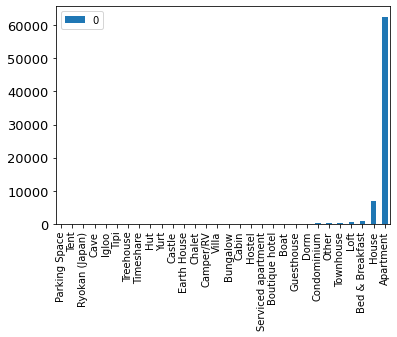

In [277]:
nb_counts = Counter(cat_df.property_type)
tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)
tdf.plot(kind='bar')

In [278]:
#Nous allons garder uniquement les types de propriété 'Apartment' et 'House' qui représente 99,6% du dataset
cat_df['property_type']=cat_df['property_type'].loc[cat_df['property_type'].isin(['Apartment','House'])]

#On supprime les ligne qui ne sont pas des appartement ou maison (devenu Nans avec le code précédent) 
cat_df=cat_df.dropna(axis=0,subset=['property_type'])

In [279]:
nb_counts = Counter(cat_df.room_type)
tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)
tdf.plot(kind='bar')

In [280]:
#On regarde la fréquence des modalités de la variable room_type
cat_df['room_type'].value_counts(normalize = True)

Entire home/apt    0.736249
Private room       0.255957
Shared room        0.007794
Name: room_type, dtype: float64

In [281]:
#Nous allons garder uniquement les types de chambre 'Entire home/apt' et 'Private room' qui représente 99,9% du dataset
cat_df['room_type']=cat_df['room_type'].loc[cat_df['room_type'].isin(['Entire home/apt','Private room'])]

#On supprime les ligne qui ne sont pas des 'Entire home/apt' ou 'Private room' (devenu Nans avec le code précédent) 
cat_df=cat_df.dropna(axis=0,subset=['room_type'])

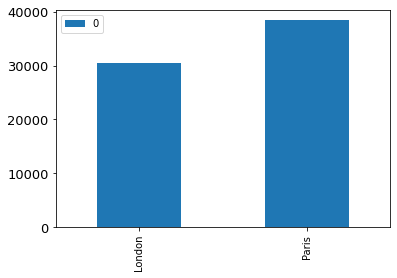

In [282]:
nb_counts = Counter(cat_df.city)
tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)
tdf.plot(kind='bar')

In [283]:
#on regarde la fréquence des modalites de la variable city
cat_df['city'].value_counts(normalize = True)

Paris     0.557679
London    0.442321
Name: city, dtype: float64

beaucoup de variables catégorielles sont remplies librement par les propriétaires et donc quasiment toutes différentes.
Il conviendra donc de faire du text mining pour les analyser ultérieurement. 

In [284]:
#On ré-assemble le dataframe variable numerique + variable catégorielles
df=pd.concat([num_df,cat_df],axis=1)

In [285]:
# Mettons maintenant ces variables au format datetime

df['host_since'] = pd.to_datetime(df['host_since'])
df['first_review'] = pd.to_datetime(df['first_review'])
df['last_review'] = pd.to_datetime(df['last_review'])

In [286]:
#Maintenant le que le df est reconstitué, on supprime les lignes qui contiennent des Nans du fait des changements dans cat_df
df=df.dropna(axis=0)


In [287]:
#On affiche un df.info
df.info()
#Tout semble en ordre pour passer à la visualisation

<class 'pandas.core.frame.DataFrame'>
Index: 68873 entries, 7735531 to 9973188
Data columns (total 62 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   host_response_rate           68873 non-null  float64       
 1   host_total_listing_count     68873 non-null  float64       
 2   latitude                     68873 non-null  float64       
 3   longitude                    68873 non-null  float64       
 4   accommodates                 68873 non-null  float64       
 5   bathrooms                    68873 non-null  float64       
 6   bedrooms                     68873 non-null  float64       
 7   beds                         68873 non-null  float64       
 8   price                        68873 non-null  float64       
 9   weekly_price                 68873 non-null  float64       
 10  monthly_price                68873 non-null  float64       
 11  cleaning_fee                 68873 non

In [288]:
#on divise le df par villes puis on les regroupe dans df pour ecraser les données précédentes de df_london et df_paris
df_paris=df[df.city=='Paris']
df_london=df[df.city=='London']
#On supprimme la première ligne de df_london car elle pose problème pour la visualisation par la suite et elle contient beaucoup de valeurs "Non-renseignées"
df_london.drop( df_london.index[0], inplace=True)
df = df_paris.append(df_london)

In [289]:
#On fait une sauvegarde du dataset nettoyé
#df.to_pickle("airbnbcleaned.csv")

#Ouverture avec le code suivant
#df = pd.read_pickle('airbnbcleaned.csv')

# **Un peu de visualisation**

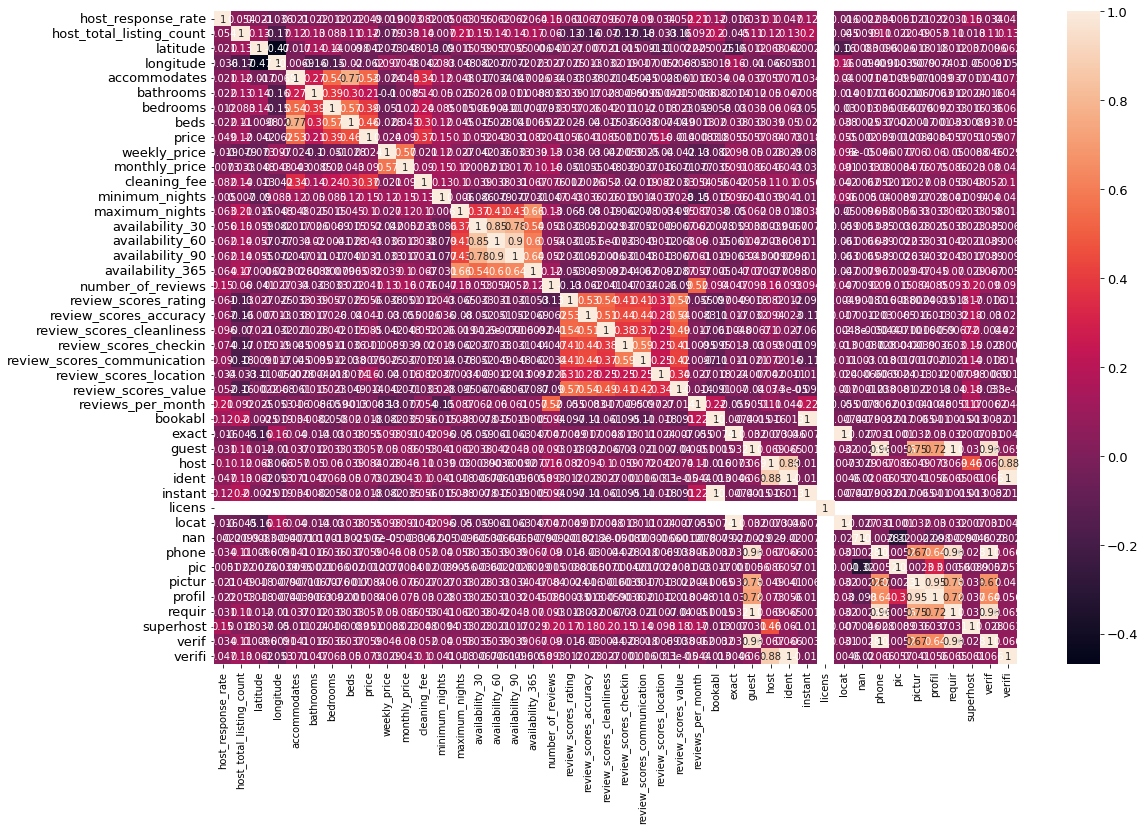

In [290]:
#on regarde les correlations de df
corr = df.corr(method='kendall')
plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=True)

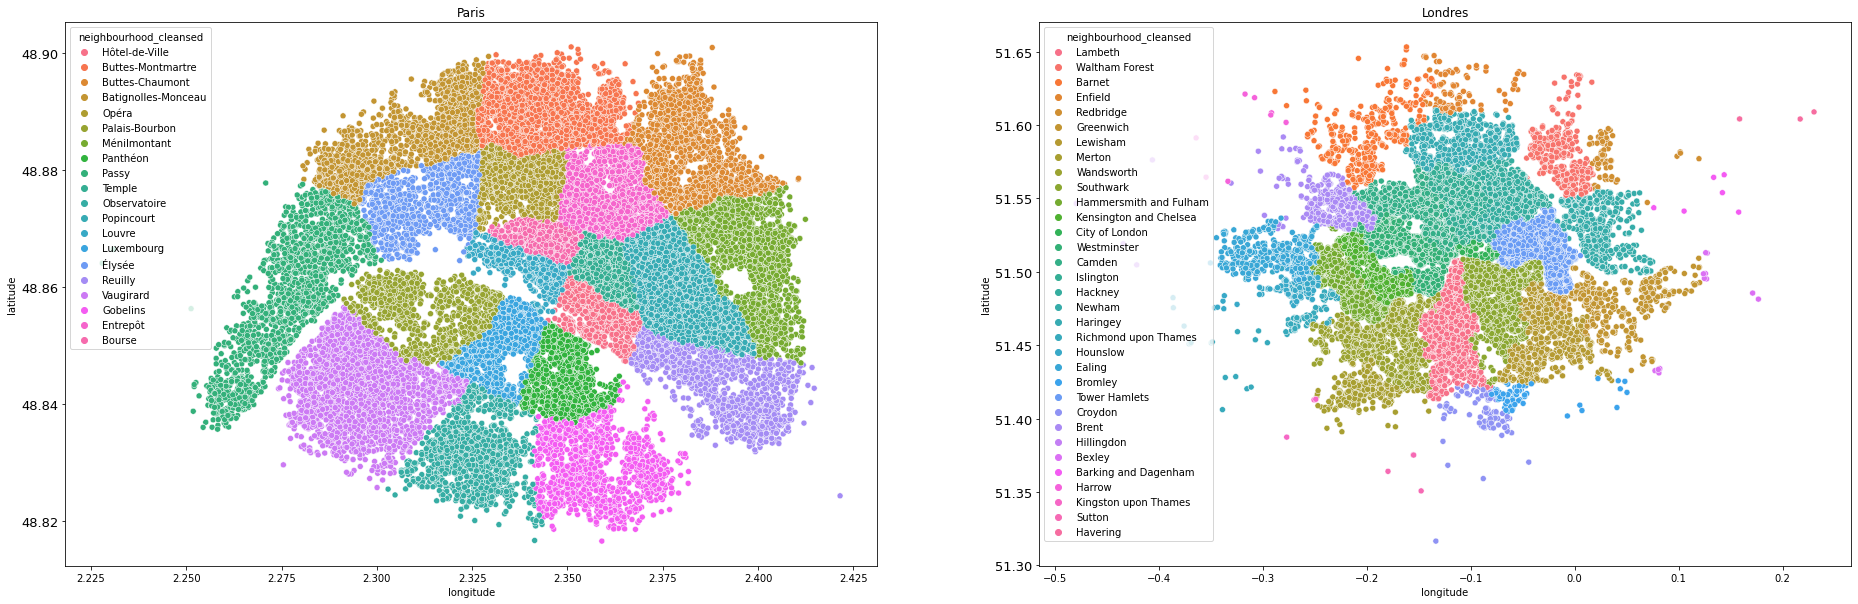

In [291]:
#visualisation de biens par Quartiers
fig = plt.figure(figsize=(32,22))

plt.subplot(221)
sns.scatterplot(df_paris.longitude,df_paris.latitude,hue=df_paris.neighbourhood_cleansed).set_title('Paris')

plt.subplot(222)
sns.scatterplot(df_london.longitude,df_london.latitude,hue=df_london.neighbourhood_cleansed).set_title('Londres')

plt.show()

On observe 20 quartiers bien distinct pour Paris.

On observe pour Londres 33 quartiers dans la légende, cependant beaucoup difficile à distinguer sur la carte car très éparpillés.

Nous allons donc regarder un peu plus en détails

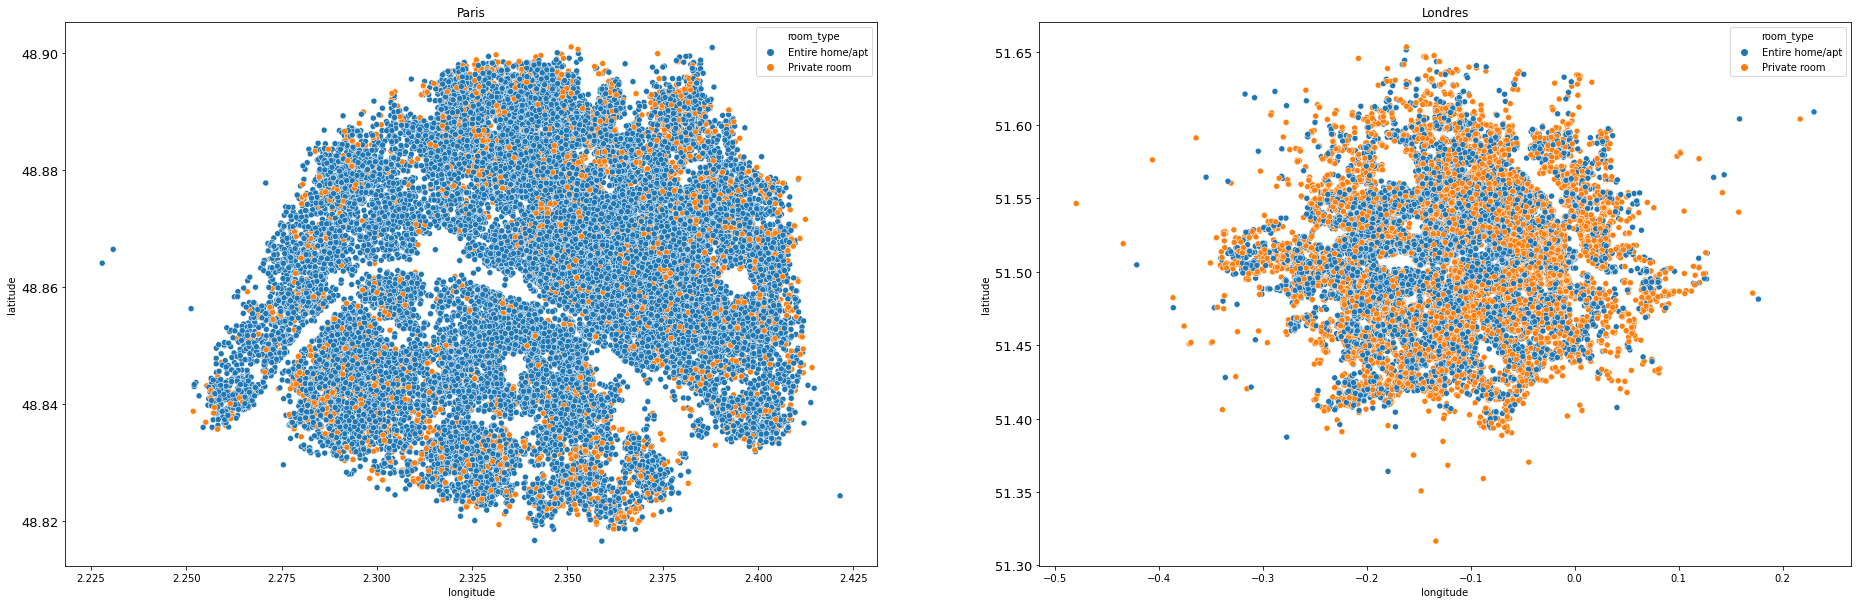

In [292]:
#visualisation par Type de chambres
fig = plt.figure(figsize=(32,22))

plt.subplot(221)
sns.scatterplot(df_paris.longitude,df_paris.latitude,hue=df_paris.room_type).set_title('Paris')

plt.subplot(222)
sns.scatterplot(df_london.longitude,df_london.latitude,hue=df_london.room_type).set_title('Londres')

plt.show()

On aperçoit une net différence entre les 2 villes. Paris propose principalement des logement entier alors que Londres propose énormément de chambres dans des logements habités.

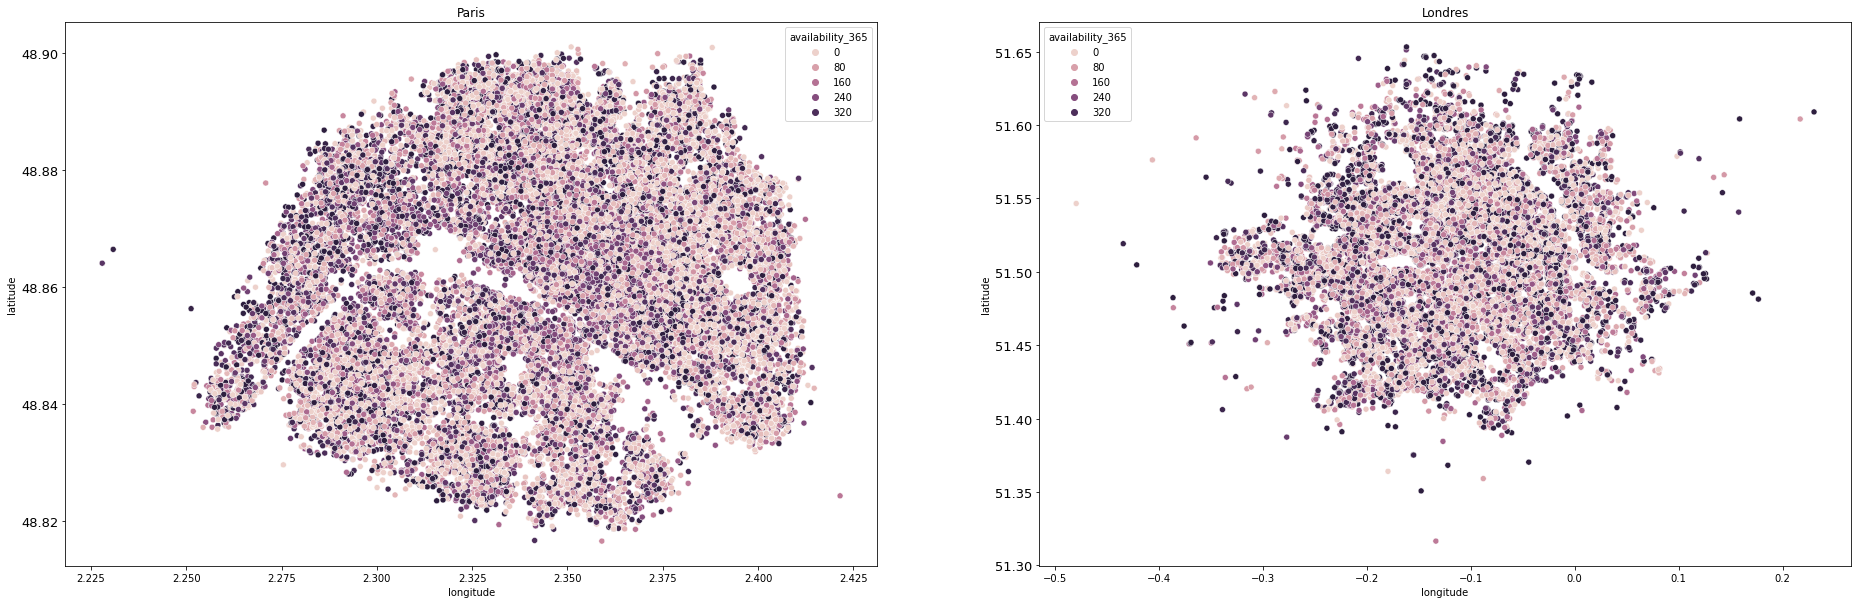

In [293]:
#visualisation par disponibilité
fig = plt.figure(figsize=(32,22))

plt.subplot(221)
sns.scatterplot(df_paris.longitude,df_paris.latitude,hue=df_paris.availability_365).set_title('Paris')

plt.subplot(222)
sns.scatterplot(df_london.longitude,df_london.latitude,hue=df_london.availability_365).set_title('Londres')

plt.show()

In [294]:
!pip install --upgrade geopandas  #à exécuter

In [295]:
#On importe les bibliotheques pour une carte intéractive
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

#On initialise la carte interactive de Paris  
lat_paris = df_paris['latitude'].tolist()
lon_paris = df_paris['longitude'].tolist()
locations_paris = list(zip(lat_paris, lon_paris))

map1 = folium.Map(location=[48.862725, 2.287592], zoom_start=12.4)
FastMarkerCluster(data=locations_paris).add_to(map1)
map1

In [296]:
#On initialise la carte interactive de Londre  
lat_london = df_london['latitude'].tolist()
lon_london = df_london['longitude'].tolist()
locations_london = list(zip(lat_london, lon_london))

map2 = folium.Map(location=[51.509865, -0.118092], zoom_start=10.5)
FastMarkerCluster(data=locations_london).add_to(map2)
map2

In [297]:
# On convertit des variables catégorielles en variables INDICATRICES pour les inclurent dans notre modèle


In [298]:
df['neighbourhood_number']= df['neighbourhood_cleansed']

In [299]:
df.neighbourhood_number.replace(['Hôtel-de-Ville', 'Buttes-Montmartre', 'Buttes-Chaumont', 'Batignolles-Monceau', 'Opéra', 'Palais-Bourbon', 'Ménilmontant', 'Panthéon', 'Passy', 'Temple', 'Observatoire', 'Popincourt', 'Louvre', 'Luxembourg', 'Élysée', 'Reuilly', 'Vaugirard', 'Gobelins', 'Entrepôt', 'Bourse'],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], inplace=True)

In [300]:
df.neighbourhood_number.replace(['Lambeth', 'Waltham Forest', 'Barnet', 'Enfield', 'Redbridge', 'Greenwich', 'Lewisham', 'Merton', 'Wandsworth', 'Southwark', 'Hammersmith and Fulham', 'Kensington and Chelsea', 'City of London', 'Westminster', 'Camden', 'Islington', 'Hackney', 'Newham', 'Haringey', 'Richmond upon Thames', 'Hounslow', 'Ealing', 'Bromley', 'Tower Hamlets', 'Croydon', 'Brent', 'Hillingdon', 'Bexley', 'Barking and Dagenham', 'Harrow', 'Kingston upon Thames', 'Sutton', 'Havering'],[101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133], inplace=True)

In [301]:
df.host_response_time.replace(['within an hour', 'within a few hours', 'a few days or more','within a day','nr'],[1, 2, 3, 4, 5], inplace=True)

In [302]:
#Création de la variable city_number
df['city_number']= df['city']

In [303]:
#On remplace les valeurs par des numéros
df.city.replace(['Paris', 'London'],[0, 1], inplace=True)

In [304]:
#Création de la variable room_type_number
df['room_type_number']= df['room_type']
#On remplace les valeurs par des numéros
df.room_type_number.replace(['Entire home/apt', 'Private room'],[0, 1], inplace=True)

In [305]:
#Création de la variable property_type_number
df['property_type_number']= df['property_type']

In [306]:
#On remplace les valeurs par des numéros
df.property_type_number.replace(['Apartment', 'House'],[0, 1], inplace=True)

In [307]:
#Création de la variable bed_type_number
df['bed_type_number']= df['bed_type']

In [308]:
#On remplace les valeurs par des numéros
df.bed_type_number.replace(['Real Bed', 'Pull-out Sofa', 'Couch', 'Futon', 'Airbed'],[0, 1, 3, 4 ,5], inplace=True)

In [309]:
df["price"] = pd.to_numeric(df["price"])

In [310]:
#On verifie quel est la date max
df['last_review'].idxmax(axis = 0)

'12582056'

In [311]:
#On affiche la date de la dernière review que l'on concidèrera comme date du jour 2017-04-06
print(df.loc['12582056'])

host_response_rate              100
host_total_listing_count          1
latitude                    48.8446
longitude                    2.3809
accommodates                      2
                             ...   
neighbourhood_number             16
city_number                   Paris
room_type_number                  0
property_type_number              0
bed_type_number                   0
Name: 12582056, Length: 67, dtype: object


In [312]:
df['today'] = pd.Timestamp('20170406')

In [313]:
#On crée une colonne inactive_time qui contient le nombre de mois entre first_review et today
df['inactive_time'] = df['today'] - df['last_review']

In [314]:
df['inactive_time']

7735531      4 days
3036231     39 days
2183529     58 days
515970      93 days
3144316     21 days
             ...   
14326702    60 days
10982355   137 days
8806061     95 days
16007813    91 days
9973188    461 days
Name: inactive_time, Length: 68872, dtype: timedelta64[ns]

In [315]:
df['ancienneté_host'] = df['today'] - df['host_since']
df['coef'] = df['availability_365'] / 365
df['disponibilite'] = (df['ancienneté_host'] * df['coef']).dt.days

In [316]:
df['succes'] = df['disponibilite'] / df['number_of_reviews']

In [317]:
df["succes"] = pd.to_numeric(df["succes"])

In [318]:
df['succes'] = pd.qcut(df['succes'], 4,labels = [1,2,3,4])




In [319]:
df["succes"] = pd.to_numeric(df["succes"])



In [320]:
#On stock les variables numérique dans num_df
num_pred=df.select_dtypes('number')




In [321]:
num_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68872 entries, 7735531 to 9973188
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype          
---  ------                       --------------  -----          
 0   host_response_rate           68872 non-null  float64        
 1   host_total_listing_count     68872 non-null  float64        
 2   latitude                     68872 non-null  float64        
 3   longitude                    68872 non-null  float64        
 4   accommodates                 68872 non-null  float64        
 5   bathrooms                    68872 non-null  float64        
 6   bedrooms                     68872 non-null  float64        
 7   beds                         68872 non-null  float64        
 8   price                        68872 non-null  float64        
 9   weekly_price                 68872 non-null  float64        
 10  monthly_price                68872 non-null  float64        
 11  cleaning_fee             

In [322]:
num_pred=num_pred.drop(['coef','inactive_time','disponibilite','number_of_reviews','reviews_per_month','latitude','longitude','ancienneté_host'], axis=1)



In [323]:
num_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68872 entries, 7735531 to 9973188
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_rate           68872 non-null  float64
 1   host_total_listing_count     68872 non-null  float64
 2   accommodates                 68872 non-null  float64
 3   bathrooms                    68872 non-null  float64
 4   bedrooms                     68872 non-null  float64
 5   beds                         68872 non-null  float64
 6   price                        68872 non-null  float64
 7   weekly_price                 68872 non-null  float64
 8   monthly_price                68872 non-null  float64
 9   cleaning_fee                 68872 non-null  float64
 10  minimum_nights               68872 non-null  float64
 11  maximum_nights               68872 non-null  float64
 12  availability_30              68872 non-null  float64
 13  availability_

In [324]:
#on stock les données explicatives dans la variable data
data = num_pred.loc[:, num_pred.columns != 'succes']


#on stock la variable cible 'review_classes' dans la variable target
target = num_pred['succes']



In [325]:
#on separe les données en un ensemble d'apprentissage et un ensemble de test(20%)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2) 

#on centre et reduit les variables explicatives des deux echantillons
X_train_scaled = preprocessing.scale(X_train)
y_train_scaled = preprocessing.scale(y_train)

In [328]:
score = []
for k in range(1, 100):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score.append(knn.score(X_test, y_test)) 
    

#Création du classificateur et entraînement du modèle
knn_m = neighbors.KNeighborsClassifier(n_neighbors=5)
knn_m.fit(X_train, y_train)

#On applique le modèle aux données de l'ensemble de test et stocker les prédictions obtenues dans la variable y_pred.
y_pred = knn.predict(X_test)

#On affiche une matrice de confusion pour comparer les classes réelles et prédites.
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite     1     2     3     4
Classe réelle                         
1               3153   315    11     2
2                517  1956   709   283
3                126  1179  1158   961
4                 26   566  1057  1756

In [329]:
#Score du modèle 
score = knn_m.score(X_test, y_test)
score

0.5871506352087115

In [330]:
# Création du classificateur et construction du modèle sur les données d'entraînement
clf_rf = ensemble.RandomForestClassifier() 

#On entraine l'algorithme sur l'ensemble d'entraînement (X_train_scaled et y_train).
clf_rf.fit(X_train_scaled, y_train)

#On crée un dictionnaire parametres contenant les valeurs possibles prises pour le paramètre
params_rf=[{'min_samples_split': [(i) for i in range (1,100,1)], 
                 'max_features': ['sqrt', 'log2']}]

#On applique la fonction model_selection.GridSearchCV() au modèle clf
grid_clf_rf = model_selection.GridSearchCV(estimator=clf_rf, param_grid=params_rf)

#On entraîne grid_clf sur l'ensemble d'entraînement, (X_train_scaled, y_train) 
#ET on sauvegarde les résultats dans l'objet grille.

grille_rf = grid_clf_rf.fit(X_train_scaled,y_train)

#on affiche toutes les combinaisons possibles d'hyperparamètres 
#et la performance moyenne du modèle associé par validation croisée.
print(pd.DataFrame.from_dict(grille_rf.cv_results_).loc[:,['params', 'mean_test_score']])

#on affiche la meilleur combinaison
print('\n''le meilleur paramètre est:',(grid_clf_rf.best_params_))

                                                params  mean_test_score
0     {'max_features': 'sqrt', 'min_samples_split': 1}              NaN
1     {'max_features': 'sqrt', 'min_samples_split': 2}         0.712307
2     {'max_features': 'sqrt', 'min_samples_split': 3}         0.713324
3     {'max_features': 'sqrt', 'min_samples_split': 4}         0.712834
4     {'max_features': 'sqrt', 'min_samples_split': 5}         0.714848
..                                                 ...              ...
193  {'max_features': 'log2', 'min_samples_split': 95}         0.706626
194  {'max_features': 'log2', 'min_samples_split': 96}         0.705773
195  {'max_features': 'log2', 'min_samples_split': 97}         0.706626
196  {'max_features': 'log2', 'min_samples_split': 98}         0.705882
197  {'max_features': 'log2', 'min_samples_split': 99}         0.705846

[198 rows x 2 columns]

le meilleur paramètre est: {'max_features': 'sqrt', 'min_samples_split': 14}


In [331]:
#on ajuste X_train
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
#on applique la meme transformation à X_test
X_test_scaled = scaler.transform(X_test)

In [332]:
#Prédiction des features test et création de la matrice de confusion

y_pred = grid_clf_rf.predict(X_test_scaled)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite     1     2     3     4
Classe réelle                         
1               3132   348     0     1
2                101  2476   793    95
3                  4   866  1780   774
4                  0   149   821  2435

In [333]:
#on affiche le score obtenu avec ce modèle
print("score:",grid_clf_rf.score(X_test_scaled,y_test))


score: 0.713103448275862


In [334]:
num_pred

host_response_rate  host_total_listing_count  ...  bed_type_number  succes
7735531                100.0                       1.0  ...                0       3
3036231                100.0                       2.0  ...                0       2
2183529                 99.0                      37.0  ...                0       2
515970                 100.0                       1.0  ...                0       3
3144316                 80.0                       1.0  ...                0       2
...                      ...                       ...  ...              ...     ...
14326702               100.0                       6.0  ...                0       2
10982355               100.0                       1.0  ...                1       4
8806061                100.0                       1.0  ...                0       4
16007813               100.0                       2.0  ...                0       2
9973188                100.0                       2.0  ...                0       3

[68872 rows x 47 columns]

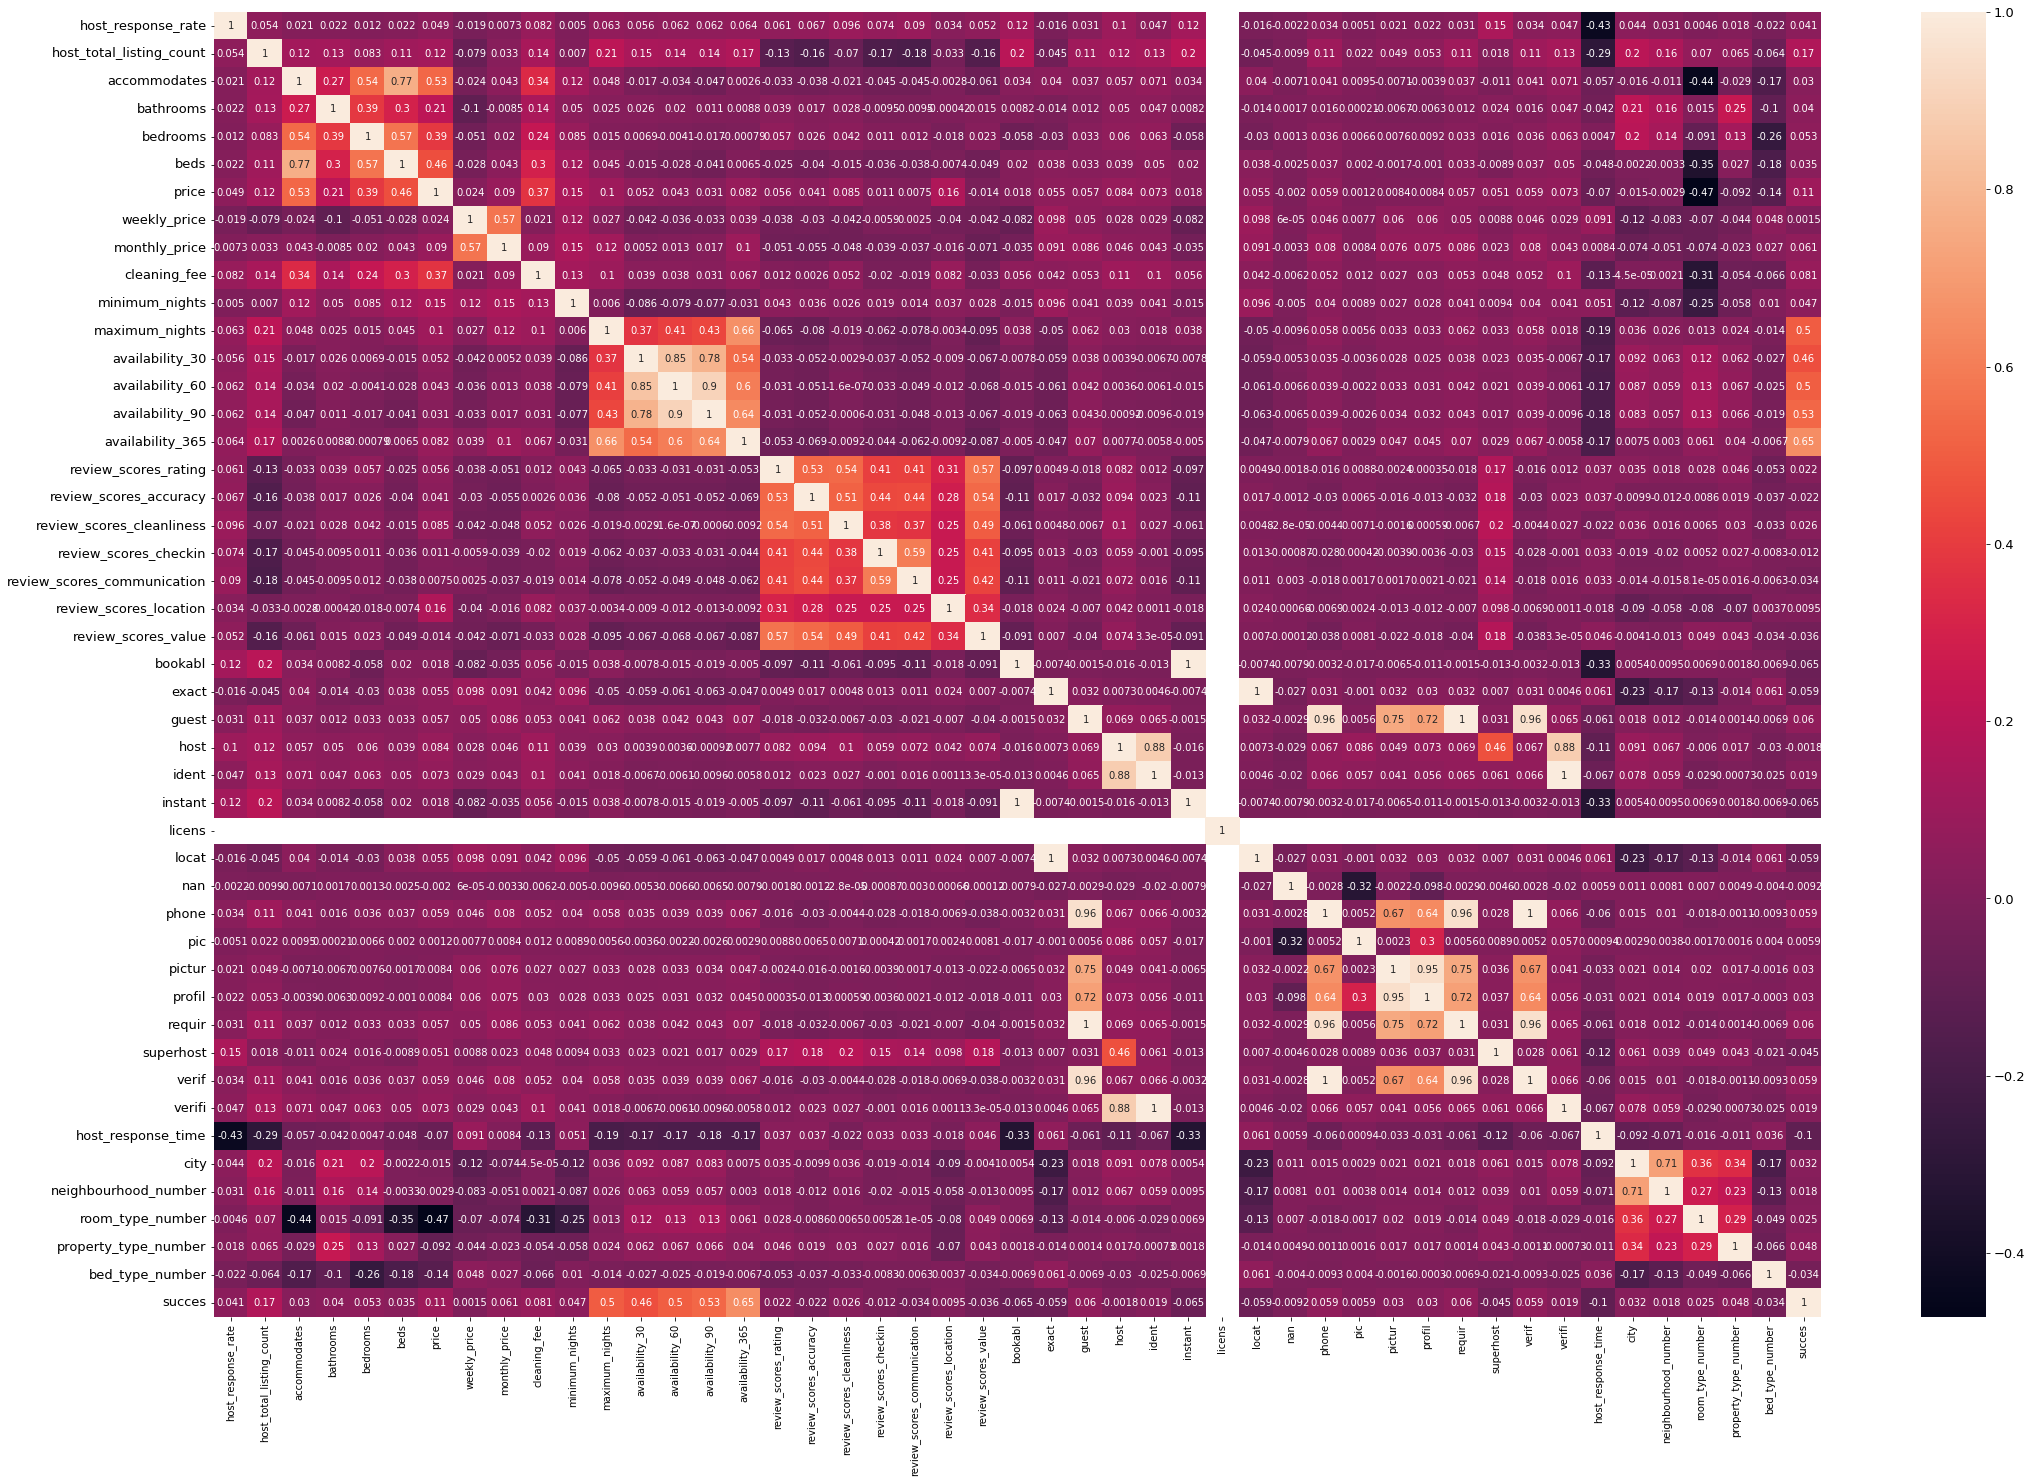

In [327]:
#on regarde les correlations de df
corr = num_pred.corr(method='kendall')
plt.figure(figsize=(36,24))
sns.heatmap(corr, annot=True)

In [1]:
df_succes_1=df[df.succes==1]

NameError: ignored

In [ ]:
df_succes_1.describe()